In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['legend.fontsize'] = 14
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
%matplotlib inline

# Intégration de mesures IMU

## Génératation d'un point fixe au niveau de la ville de Paris

In [11]:
lat_Paris = 48.8534 # en degrés
lon_Paris = 2.3488 # en degrés
alt_Paris = 35 # en mètre

In [12]:
dt = 0.01 # s
duree = 3600 # s
n_samples = int(duree/dt)
I3 = np.identity(3)
Cnb = np.repeat(I3[None,...],n_samples,axis=0)

Les vitesses Nord et Est sont nulles

In [13]:
VN = np.zeros(n_samples)
VE = np.zeros(n_samples)

In [14]:
from pyins import sim

In [15]:
gyros, accels = sim.stationary_rotation(dt, lat_Paris, alt_Paris, Cnb)

In [17]:
# test de cohérence
from pyins import earth 
g = earth.gravity(np.sin(np.deg2rad(lat_Paris)), alt_Paris)
print(dt*g/accels[0,2])

1.0000001381172956


Text(0.5, 0, 'time, s')

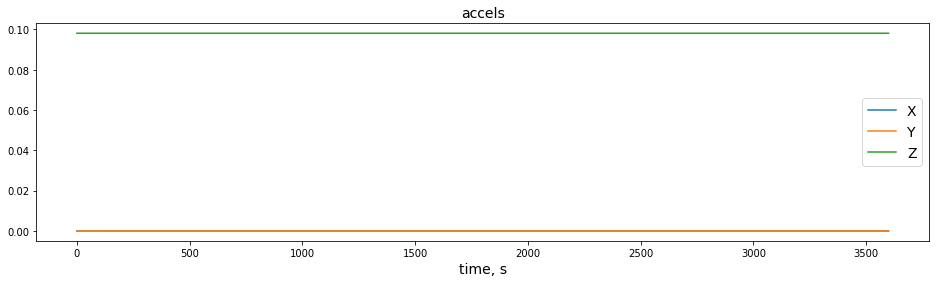

In [18]:
tps = np.linspace(0, duree, n_samples-1)
# Affichage de la donnée accélérométrique
plt.figure(figsize=(16, 4))
plt.title('accels')
plt.plot(tps, accels)
plt.legend(('X', 'Y', 'Z'), loc='best')
plt.xlabel("time, s")

In [19]:
# test de cohérence
print(dt*earth.RATE/np.linalg.norm(gyros[0,:]))

1.0


Text(0.5, 0, 'time, s')

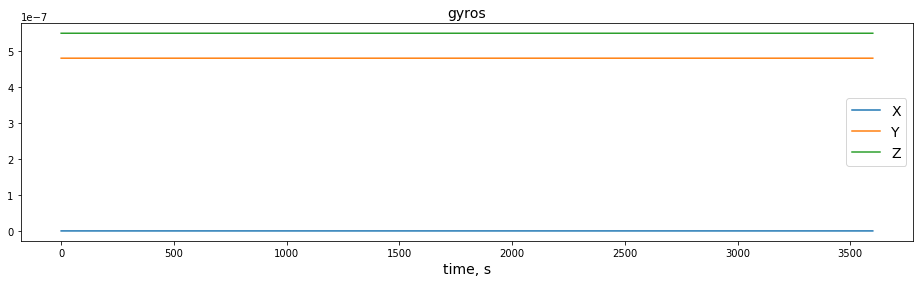

In [20]:
# Affichage des données gyrométriques
plt.figure(figsize=(16, 4))
plt.title('gyros')
plt.plot(tps, gyros)
plt.legend(('X', 'Y', 'Z'), loc='best')
plt.xlabel("time, s")

## Intégration des mesures accélérométriques et gyrométriques

In [21]:
from pyins.integrate import coning_sculling, integrate
from pyins.filt import traj_diff

Correction des mouvements coniques et de sculling 

In [22]:
theta, dv = coning_sculling(gyros, accels)

Conditions initiales d'intégration

In [23]:
from pyins.dcm import _to_hpr_array

In [24]:
h, p, r = _to_hpr_array(Cnb)

In [25]:
traj = integrate(dt, lat_Paris, lon_Paris, VN[0], VE[0], h[0], p[0], r[0], theta, dv, stamp=0)

Affichage l'erreur par rapport à la reférence, le point fixe

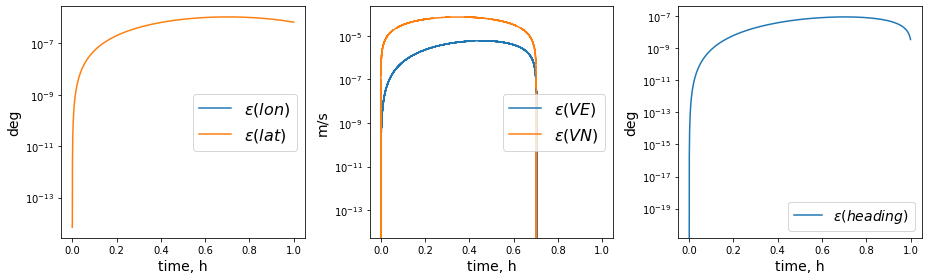

In [27]:
tps = traj.index * dt / 3600
plt.figure(figsize=(13, 4))
# elat = f(lon)
plt.subplot(131)
plt.plot(tps, traj.lon - lat_Paris*np.ones_like(traj.lon), label='$\epsilon (lon)$')
plt.plot(tps, traj.lat - lat_Paris*np.ones_like(traj.lon), label='$\epsilon (lat)$')
plt.xlabel("time, h")
plt.ylabel("deg")
plt.yscale('log')
plt.legend(fontsize=16, loc='center right')
# eVE, eVE = f(t)
plt.subplot(132)
plt.plot(tps, traj.VE, label='$\epsilon (VE)$')
plt.plot(tps, traj.VN, label='$\epsilon (VN)$')
plt.xlabel("time, h")
plt.ylabel("m/s")
plt.yscale('log')
plt.legend(fontsize=16, loc='center right')
# eheading = f(t)
plt.subplot(133)
plt.plot(tps, traj.h, label='$\epsilon (heading)$')
plt.yscale('log')
plt.xlabel("time, h")
plt.ylabel("deg")
plt.legend(loc='best')

plt.tight_layout()